### EL6123 Computer Assignment #5: K-Means
#### Aimee Nogoy <br>akn264

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline
import cv2

In [121]:
# import the sklearn stuff
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances_argmin
from time import time

In [95]:
ramen = cv2.imread('ramen.jpg', 1)
# ramen = cv2.imread('sagrada2.jpg', 1)
ramen = cv2.cvtColor(ramen, cv2.COLOR_RGB2BGR)

### 1. Image Color Quantization Using K-means Algorithm

In [96]:
def recreate_image(codebook, labels, w, h):
    # Recreate the compressed image (bc quantizing colors) from the codebook and labels
    d = codebook.shape[1]
#     print(codebook.shape)
    image =  np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [125]:
# K-means color quant function
def color_quant(K, img):
    img = np.array(img, dtype=np.float) / 255
    
#     transform image to 2d array
    w, h, d = original_shape = tuple(img.shape)
    assert d == 3
    image_array = np.reshape(img, (w * h, d))
    
#     fit model on small sub-sample of data
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters = K, random_state = 0).fit(image_array_sample)
    print('done in %0.3fs.' % (time() - t0))
    
#     now get labels for all the points
    print('Predicting color indices on the full image with k-means')
    t0 = time()
    labels = kmeans.predict(image_array)
    print('done in %0.3fs.' % (time() - t0))
    
    imgq = recreate_image(kmeans.cluster_centers_, labels, w, h)
    
#     benchmark algo
    codebook_random = shuffle(image_array, random_state=0)[:K + 1]
    print('Predicting color indices on the full image (random)')
    t0 = time()
    labels_random = pairwise_distances_argmin(codebook_random, image_array, axis = 0)
    print('done in %0.3fs' % (time() - t0))
    
#     benchmark algo image result
    imgqr = recreate_image(codebook_random, labels_random, w, h)
    
    return imgq, imgqr

In [126]:
# for K = 256
K = 256
ramen256, ramen256r = color_quant(K, ramen)

done in 1.657s.
Predicting color indices on the full image with k-means
done in 2.537s.
Predicting color indices on the full image (random)
done in 2.274s


In [127]:
# for K = 64
K = 64
ramen64, ramen64r = color_quant(K, ramen) # nintendo 64 ayyyy

done in 0.451s.
Predicting color indices on the full image with k-means
done in 0.983s.
Predicting color indices on the full image (random)
done in 0.807s


(-0.5, 1080.5, 1043.5, -0.5)

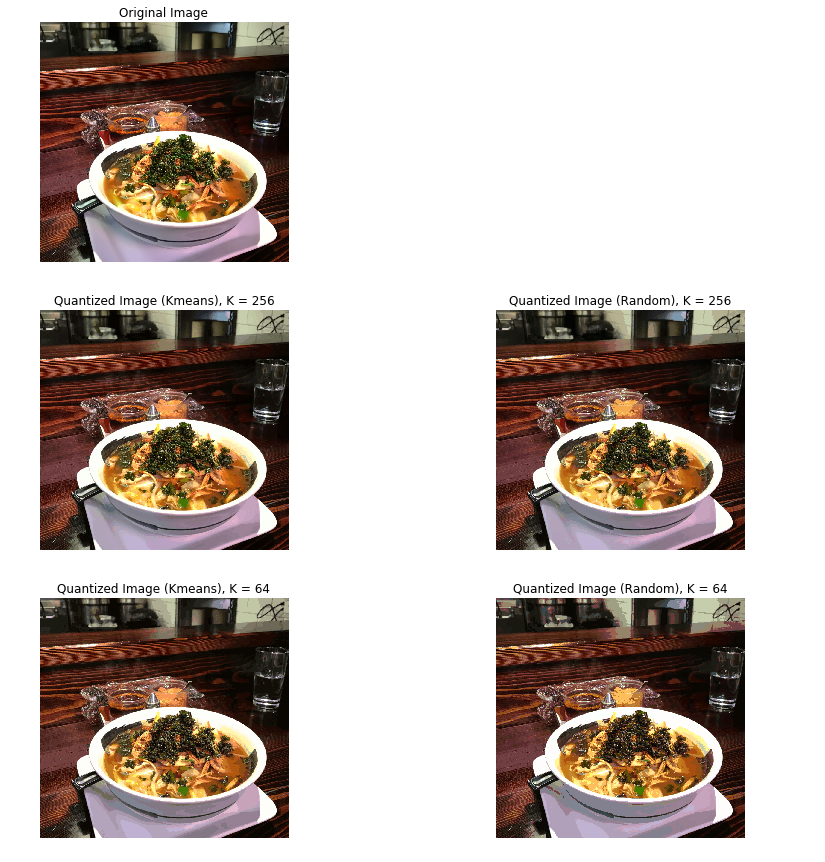

In [133]:
fig, [[ax1, ax2],[ax3, ax4],[ax5, ax6]] = plt.subplots(3, 2, figsize = [15, 15])

ax1.imshow(ramen); ax1.set_title('Original Image');
ax1.axis('off')

ax2.axis('off')

ax3.imshow(ramen256); ax3.set_title('Quantized Image (Kmeans), K = 256');
ax3.axis('off')

ax4.imshow(ramen256r); ax4.set_title('Quantized Image (Random), K = 256');
ax4.axis('off')

ax5.imshow(ramen64); ax5.set_title('Quantized Image (Kmeans), K = 64');
ax5.axis('off')

ax6.imshow(ramen64r); ax6.set_title('Quantized Image (Random), K = 64')
ax6.axis('off')

#### Comments

As opposed to the K = 256, K = 64 clusters shows some artifacts in the background of the picture. Despite this, all the quantized images -- both k-means and random -- look quite similar to the original.

#### Now modify the initialization process
<p>I used `init = 'k-means++'` and `n_init = 1` as suggested in the problem statement.

In [101]:
# K-means color quant function
def color_quant2(K, img, state):
    img = np.array(img, dtype=np.float) / 255
    
#     transform image to 2d array
    w, h, d = original_shape = tuple(img.shape)
    assert d == 3
    image_array = np.reshape(img, (w * h, d))
    
#     fit model on small sub-sample of data
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters = K, init = 'k-means++', n_init = 1, verbose = True, random_state = state)
    kmeans.fit(image_array_sample)
    
#     now get labels for all the points
    print('\nPredicting color indices on the full image with k-means: %s\n\n' % kmeans)
    t0 = time()
    labels = kmeans.predict(image_array)
    print('done in %0.3fs.' % (time() - t0))
    
    imgq = recreate_image(kmeans.cluster_centers_, labels, w, h)
    
    return imgq

In [103]:
K = 64
shiz = color_quant2(K, ramen, 40)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.95848257178
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.86365142483
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.82471659175
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.81373388642
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.80880714942
start iteration
done sorting
end inner loop
Iteration 5, inertia 1.80376587144
start iteration
done sorting
end inner loop
Iteration 6, inertia 1.80084284026
start iteration
done sorting
end inner loop
Iteration 7, inertia 1.79863442532
start iteration
done sorting
end inner loop
Iteration 8, inertia 1.79821427026
start iteration
done sorting
end inner loop
Iteration 9, inertia 1.79702430859
start iteration
done sorting
end inner loop
Iteration 10, inertia 1.7948180556
start iteration
done sorting
end inner loop
Iteration 11, inertia 1.79332429781
start iteration
done sortin

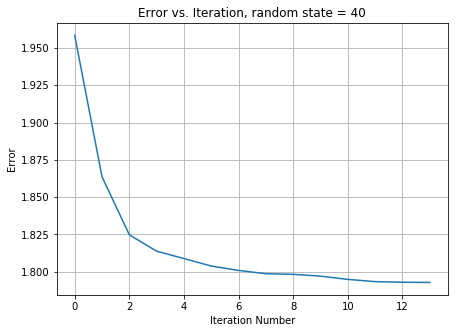

In [104]:
# the dumb way
iternum = np.arange(0,14)
inertia = np.array([1.95848257178, 1.86365142483, 1.82471659175, 1.81373388642, 1.80880714942, \
                    1.80376587144, 1.80084284026, 1.79863442532, 1.79821427026,  1.7970243085, \
                    1.7948180556, 1.79332429781, 1.79292804423, 1.7927822103])

plt.figure(1, figsize=(7,5));
plt.plot(iternum, inertia); plt.grid(1)
plt.title('Error vs. Iteration, random state = 40');
plt.ylabel('Error'); plt.xlabel('Iteration Number')


In [105]:
shiz2 = color_quant2(64, ramen, 5)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.95087781123
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.82993235592
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.79403959066
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.77589929943
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.76155643506
start iteration
done sorting
end inner loop
Iteration 5, inertia 1.75665761635
start iteration
done sorting
end inner loop
Iteration 6, inertia 1.75516765725
start iteration
done sorting
end inner loop
Iteration 7, inertia 1.75451429549
start iteration
done sorting
end inner loop
Iteration 8, inertia 1.75245541371
start iteration
done sorting
end inner loop
Iteration 9, inertia 1.75245541371
center shift 0.000000e+00 within tolerance 8.352175e-06

Predicting color indices on the full image with k-means: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
  

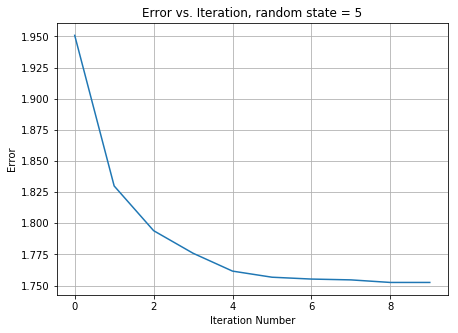

In [106]:
iternum = np.arange(0,10)
inertia = np.array([1.95087781123, 1.82993235592, 1.79403959066, 1.77589929943, \
                   1.76155643506, 1.75665761635, 1.75516765725, 1.75451429549, \
                   1.75245541371, 1.75245541371])

plt.figure(1, figsize=(7,5));
plt.plot(iternum, inertia); plt.grid(1)
plt.title('Error vs. Iteration, random state = 5');
plt.ylabel('Error'); plt.xlabel('Iteration Number')


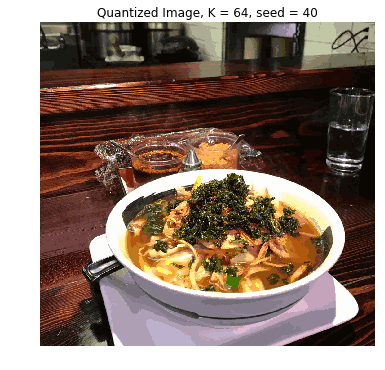

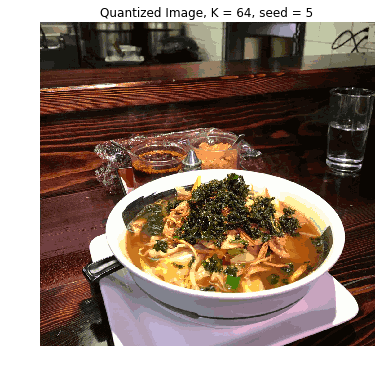

In [107]:
# display pix
plt.figure(1, figsize=(6,6));
plt.imshow(shiz); plt.axis('off'); 
plt.title('Quantized Image, K = 64, seed = 40')

plt.figure(2, figsize=(6,6));
plt.imshow(shiz2); plt.axis('off');
plt.title('Quantized Image, K = 64, seed = 5')

** Comments **
<p>The error curves for each random state (40 and 5) are of similar shape but not entirely the same--number of iterations and each inertia were different for the different seeds. In terms of the quantized images, they look very similar. So for this particular image and for K = 64, the seed of the random number generator doesn't significantly affect the color quantization quality, as in the quantization stays true to the original image I think.

### 2. Image Segmentation 
<p>**considering both color homogeneity and region connectivity **

Modify function to include both color and pixel coordinate--> the feature vector of each pixel that will be used in Kmeans.fit() for the codebook cookbook and Kmeans.predict() to find the label of each pixel

In [108]:
# Modify recreate image function a bit
def recreate_image2(codebook, labels, w, h):
    # Recreate the compressed image (bc quantizing colors) from the codebook and labels
    codebook = codebook[:, 2:5] # bc codebook includes all 5 features. 
#     only using the color information
    d = codebook.shape[1]
    image =  np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [114]:

# Modifiy K-means color quant function for image segmentation
def img_seg(K, img, wt):
#     img = np.array(img, dtype=np.float) / 255 # do I need this line?
    
#     transform image to 2d array
    w, h, d = original_shape = tuple(img.shape)
    
    x = []
    y = []
    r = []
    g = []
    b = []

    height = img.shape[0]
    width = img.shape[1]
    nrows = np.arange(height)
    ncols = np.arange(width)

    for i in nrows:
        for j in ncols:
            x.append(i)
            y.append(j)
            b.append(img[i,j,0])
            g.append(img[i,j,1])
            r.append(img[i,j,2])

    x = np.array(x)
    y = np.array(y)
    b = np.array(b)
    g = np.array(g)
    r = np.array(r)

    # add weights to position data
    x2 = (x / height) * 255 * wt
    y2 = (y / width) * 255 * wt

    features = np.vstack([x2,y2,b,g,r]).T
    
#     fit model on small sub-sample of data
    t0 = time()
    image_array_sample = shuffle(features, random_state=0)[:1000]
    kmeans = KMeans(n_clusters = K, random_state = 0, verbose = True).fit(image_array_sample)
    print('done in %0.3fs.' % (time() - t0))
    
#     now get labels for all the points
    print('Predicting color indices on the full image with k-means')
    t0 = time()
    labels = kmeans.predict(features)
    print('\ndone in %0.3fs.' % (time() - t0))
    
    imgq = recreate_image2(kmeans.cluster_centers_, labels, w, h)
    
    return imgq

The parameter `K = 64` is used for the next three trials, with a variable weight `wt = 0.25, 0.5, 1` for each pixel location.

In [115]:
K = 64
wt = 0.25
ramens1 = img_seg(K, ramen, wt)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 335240.905436
start iteration
done sorting
end inner loop
Iteration 1, inertia 314160.717341
start iteration
done sorting
end inner loop
Iteration 2, inertia 307795.953274
start iteration
done sorting
end inner loop
Iteration 3, inertia 303031.605005
start iteration
done sorting
end inner loop
Iteration 4, inertia 301496.932584
start iteration
done sorting
end inner loop
Iteration 5, inertia 300237.455176
start iteration
done sorting
end inner loop
Iteration 6, inertia 299499.706026
start iteration
done sorting
end inner loop
Iteration 7, inertia 299126.482811
start iteration
done sorting
end inner loop
Iteration 8, inertia 298789.126279
start iteration
done sorting
end inner loop
Iteration 9, inertia 298460.370214
start iteration
done sorting
end inner loop
Iteration 10, inertia 298077.157906
start iteration
done sorting
end inner loop
Iteration 11, inertia 297421.657025
start iteration
done sorti

In [116]:
wt = 0.5
ramens2 = img_seg(K, ramen, wt)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 563558.713622
start iteration
done sorting
end inner loop
Iteration 1, inertia 532178.566194
start iteration
done sorting
end inner loop
Iteration 2, inertia 519915.214244
start iteration
done sorting
end inner loop
Iteration 3, inertia 515718.962368
start iteration
done sorting
end inner loop
Iteration 4, inertia 514549.32566
start iteration
done sorting
end inner loop
Iteration 5, inertia 513405.461269
start iteration
done sorting
end inner loop
Iteration 6, inertia 512792.872322
start iteration
done sorting
end inner loop
Iteration 7, inertia 512792.872322
center shift 0.000000e+00 within tolerance 3.808339e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 570462.228461
start iteration
done sorting
end inner loop
Iteration 1, inertia 539710.778058
start iteration
done sorting
end inner loop
Iteration 2, inertia 527257.26742
start iteration
done sorting


In [117]:
wt = 1
ramens3 = img_seg(K, ramen, wt)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1147235.89476
start iteration
done sorting
end inner loop
Iteration 1, inertia 1070126.97746
start iteration
done sorting
end inner loop
Iteration 2, inertia 1049481.34422
start iteration
done sorting
end inner loop
Iteration 3, inertia 1037603.00833
start iteration
done sorting
end inner loop
Iteration 4, inertia 1029715.13794
start iteration
done sorting
end inner loop
Iteration 5, inertia 1026415.03636
start iteration
done sorting
end inner loop
Iteration 6, inertia 1023041.363
start iteration
done sorting
end inner loop
Iteration 7, inertia 1018579.11577
start iteration
done sorting
end inner loop
Iteration 8, inertia 1011482.03794
start iteration
done sorting
end inner loop
Iteration 9, inertia 1008925.7287
start iteration
done sorting
end inner loop
Iteration 10, inertia 1008925.7287
center shift 0.000000e+00 within tolerance 5.457554e-01
Initialization complete
start iteration
done sorting
e

(-0.5, 1080.5, 1043.5, -0.5)

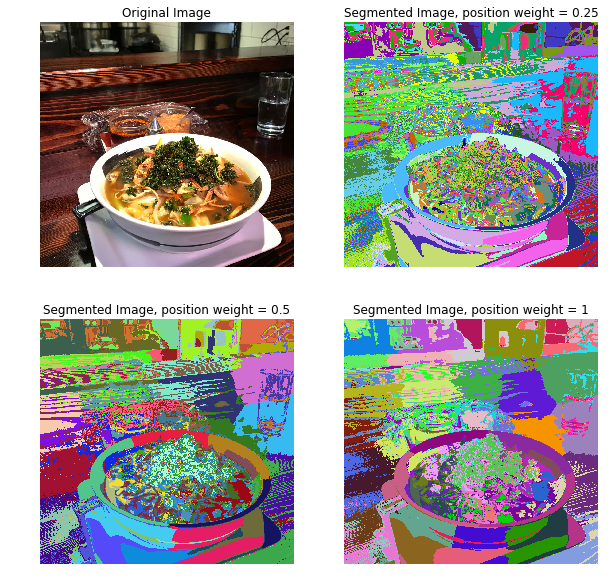

In [113]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize = [10, 10])

ax1.imshow(ramen); ax1.set_title('Original Image');
ax1.axis('off')

ax2.imshow(ramens1); ax2.set_title('Segmented Image, position weight = 0.25');
ax2.axis('off')

ax3.imshow(ramens2); ax3.set_title('Segmented Image, position weight = 0.5');
ax3.axis('off')

ax4.imshow(ramens3); ax4.set_title('Segmented Image, position weight = 1');
ax4.axis('off')

** Error Curves **
<p> Based on the best initialization in terms of inertia. Data and plots are also in accompanying Excel spreadsheet.

<img src = "error_curve_1.jpg" width = "300" height = "300">
<br><img src = "error_curve_2.jpg" width = "300" height = "300">
<br><img src = "error_curve_3.jpg" width = "300" height = "300">

#### Comments

As seen in the error curves, they follow a similar shape -- always decreasing with each iteration. As w increases, the segmented image shows more regional connectivity, which makes sense due to the increasing weight on the point locations. 

In [118]:
plt.show()